In [21]:
#house prices regression

In [50]:
#libraries import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn import datasets, linear_model, metrics

In [51]:
train = pd.read_csv('../data/raw/train.csv')

In [52]:
#explanitory analysis (EDA)
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [53]:
print(train.head())

   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD   

In [54]:
train.shape

(1460, 81)

In [55]:
#Display unique counts per column with formatted output
train.nunique().to_frame().rename(columns={0: 'Unique Values'}).style.format({'Unique Values': '{:,.0f}'})

#replace na for mode or for text 'None'    
    

,Unique Values
Id,"1,460"
MSSubClass,15
MSZoning,5
LotFrontage,110
LotArea,"1,073"
Street,2
Alley,2
LotShape,4
LandContour,4
Utilities,2


In [28]:
#na cleanup

In [29]:
#basements
basements=train[['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2']]
basements[basements.isnull().any(axis=1)]
#index 948 and 332 are the problem. drop those rows

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2
17,NaN,NaN,NaN,NaN,NaN
39,NaN,NaN,NaN,NaN,NaN
90,NaN,NaN,NaN,NaN,NaN
102,NaN,NaN,NaN,NaN,NaN
156,NaN,NaN,NaN,NaN,NaN
182,NaN,NaN,NaN,NaN,NaN
259,NaN,NaN,NaN,NaN,NaN
332,Gd,TA,No,GLQ,NaN
342,NaN,NaN,NaN,NaN,NaN
362,NaN,NaN,NaN,NaN,NaN


In [56]:
#electrical
electrical=train['Electrical']
electrical[electrical.isnull()]


1379    NaN
Name: Electrical, dtype: object

In [63]:
#replace LotFrontage with median of that column
train['LotFrontage'].median()
train['LotFrontage']=train['LotFrontage'].fillna(69).astype(int)

In [67]:
#drop all rows with problems
train_new = train.drop([train.index[948], train.index[332],train.index[1379]])

In [70]:
#change all nas to 'none'
train_new.fillna('None', inplace=True)

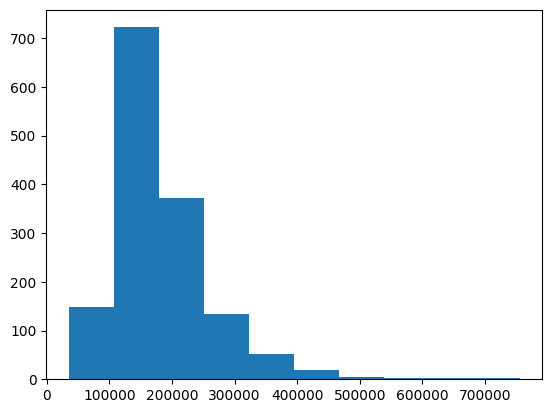

In [75]:
# looking at the response variable. The data is positivly sqewed. Maybe there are some outliers. 
plt.hist(train_new['SalePrice'])
plt.show()

In [76]:
#normalize dependant variable to minimize outlier effect
y_norm = np.log(train_new['SalePrice'])

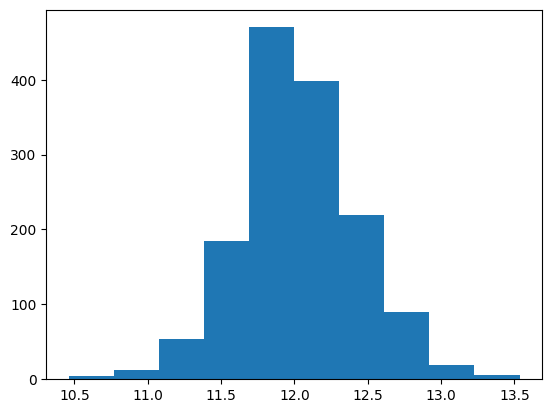

In [77]:
plt.hist(y_norm)
plt.show()

In [37]:
##DO NOT RUN> TOO LONG TO LOAD##
#variable will need to be evaluated seperately. 

#plt.figure()
#sns.pairplot(train)
#plt.show()

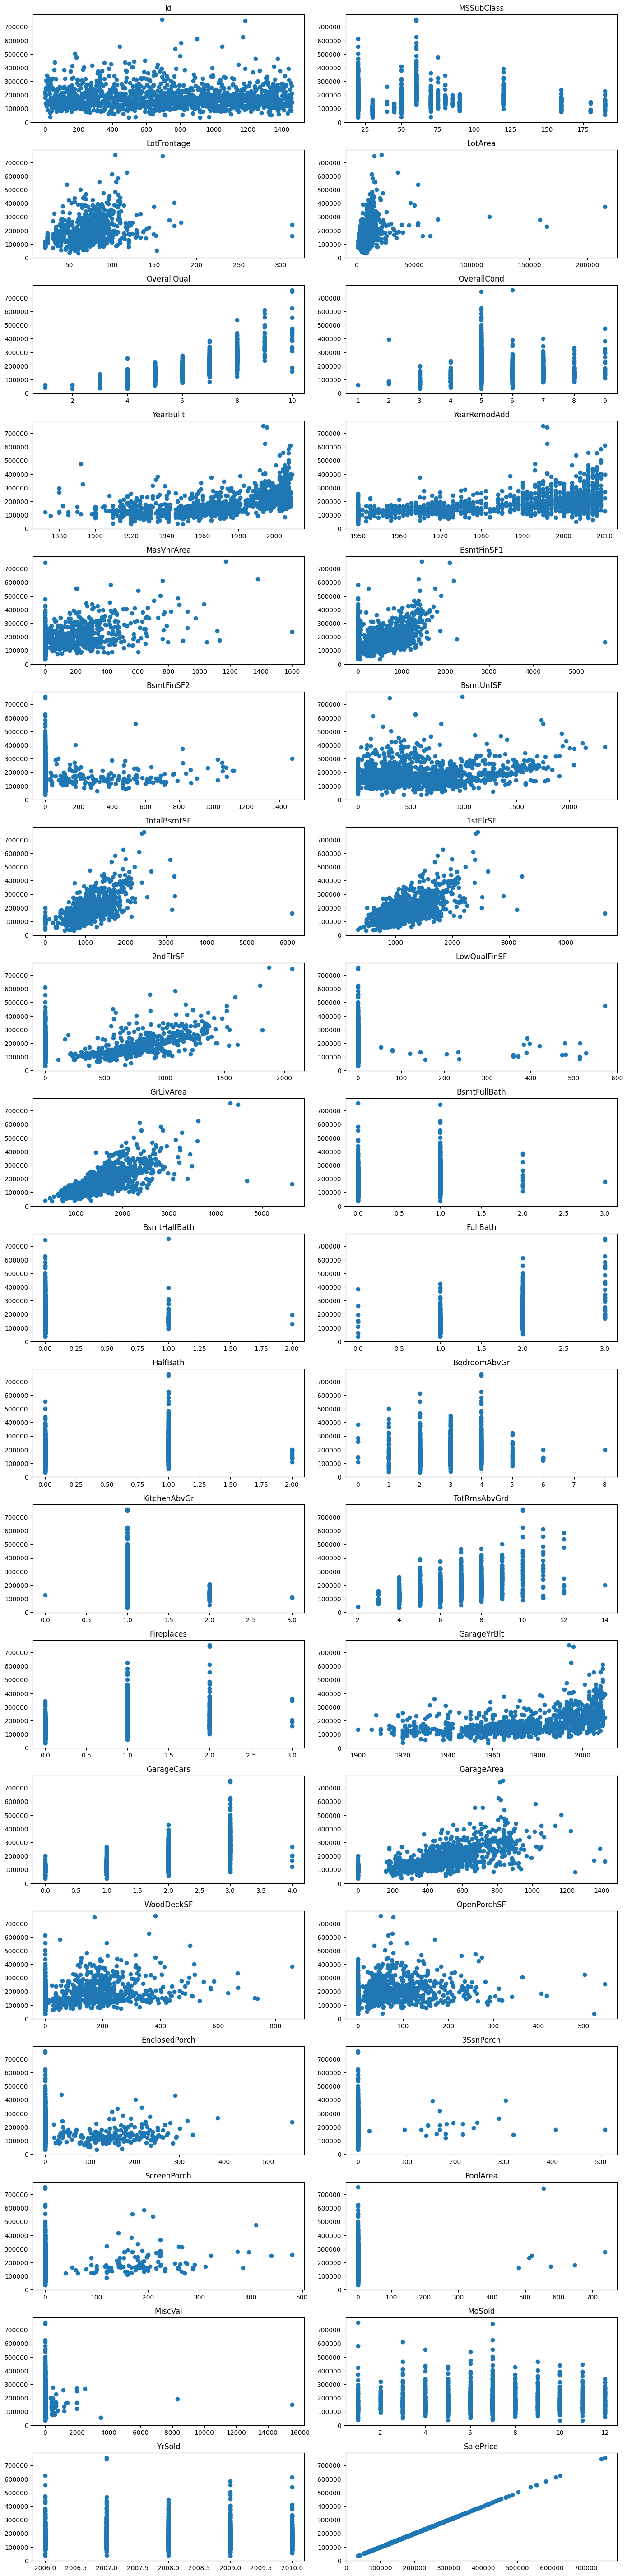

In [38]:
#explore the correlation of each vairable to the sale price

# Identify numerical columns
numerical_columns = train.select_dtypes(include=["int64", "float64"]).columns

# Plot distribution of each numerical feature
plt.figure(figsize=(14, len(numerical_columns) * 3))
for idx, feature in enumerate(numerical_columns, 1):
    plt.subplot(len(numerical_columns), 2, idx)
    plt.scatter( train[feature],train['SalePrice'])
    plt.title(f"{feature}")

# Adjust layout and show plots
plt.tight_layout()
plt.show()

#Thigs that Positivily affect the sale price: 
#TotalBsmtSF, 1stFlrSF, 2ndFlrSF, GrLivArea, FullBath, TotRmsAbvGrd, GarageYrBlt, GarageArea

#Things that have no effect (or too few information)- consider dropping these features. 
#MiscVal, PoolArea

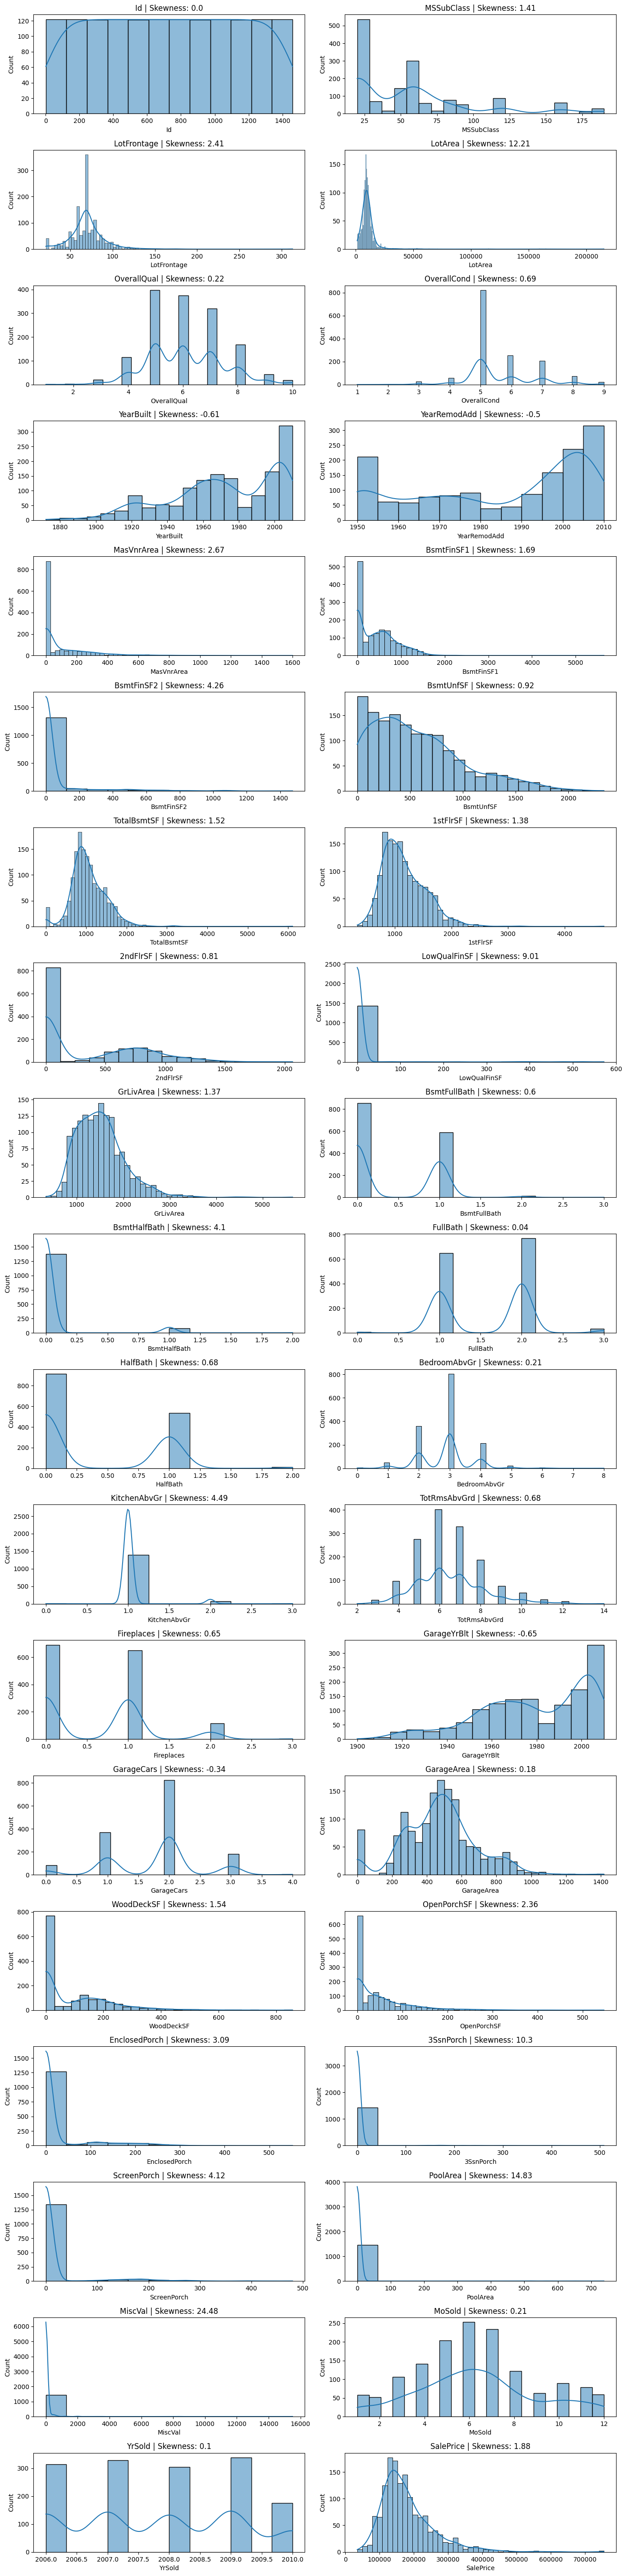

In [39]:
#exploring the sqewness of the vairables

# Plot distribution of each numerical feature
plt.figure(figsize=(14, len(numerical_columns) * 3))
for idx, feature in enumerate(numerical_columns, 1):
    plt.subplot(len(numerical_columns), 2, idx)
    sns.histplot(train[feature], kde=True)
    plt.title(f"{feature} | Skewness: {round(train[feature].skew(), 2)}")

# Adjust layout and show plots
plt.tight_layout()
plt.show()

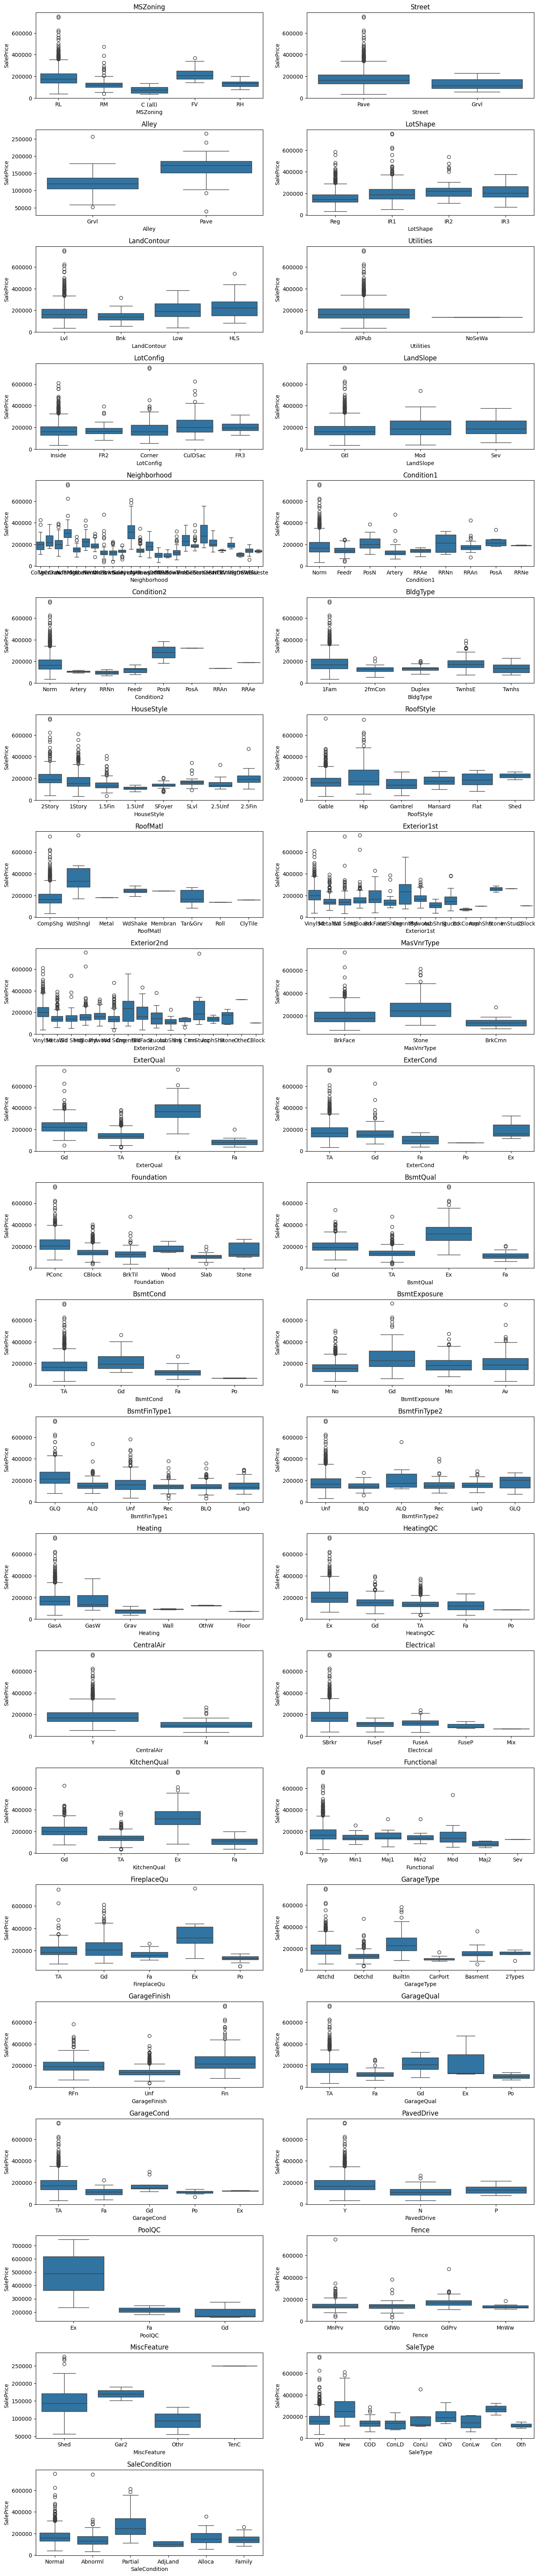

In [40]:
#explore non numerical features:
# Identify non-numberical columns
non_numerical_columns = train.select_dtypes(include=['object']).columns

# Plot distribution of each numerical feature
plt.figure(figsize=(14, len(non_numerical_columns) * 3))
for idx, feature in enumerate(non_numerical_columns, 1):
    plt.subplot(len(non_numerical_columns), 2, idx)
    sns.boxplot(x=train[feature], y=train['SalePrice'])
    plt.title(f"{feature}")

# Adjust layout and show plots
plt.tight_layout()
plt.show()

#NA has been left out. Can we find a way to keep it in?

#Zone RL is most expensive, Street Pave is most expensive, paved alleys are more expensive, 2 story, 
#exc qualatiy material of external,basement, heating and air con, good kitchen, fireplace,  




In [41]:
#next to observe, are vairables correlated to each other? 

In [42]:
#preprocess data so its in correct format. factor, numberical etc. tranforom variables to log

In [81]:
#convert categorical columns to numerical for linear regression
train = pd.get_dummies(train_new, drop_first=True) 

In [82]:
#split data into train test
X=train.drop(['SalePrice'], axis=1)
Y= y_norm

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X,Y,random_state=104,test_size=0.2,shuffle=True) 

In [84]:
#Linear regression: 
reg = linear_model.LinearRegression()
reg.fit(X_train, y_train)


LinearRegression()

In [90]:
#predict sales price on test set
predictions = reg.predict(X_test)

In [89]:
#Apply inverse transformation to bring predictions back to the original scale
predictions = np.exp(predictions)
predictions[:5]  

array([148023.54596871,  67386.72274688, 172132.94772762, 260492.30900699,
       329830.29337607])